In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scikit_posthocs as sp
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.metrics import r2_score

from statsmodels.stats.multicomp import MultiComparison
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import metrics


from scipy.stats import linregress

# Carregando o dataset

In [118]:
df = pd.read_csv('datasets/banco_por_semestre.csv', sep = ',', encoding = "ISO-8859-1", low_memory = False, error_bad_lines=False).drop(['Unnamed: 0'], axis=1,errors='ignore')
df.head()

,Id,SEMESTRE,DN,Idade,Codsexo,Raça,pesoi,pesof,Alt,instruc,...,TFG,TFG_EQ,Estagio,Estagio_EQ,ESTAGIOI,ESTAGIOF,ESTAGIOI_EQ,ESTAGIOF_EQ,CREATININAI,CREATININAF
0,27,2010,29-May-40,74.0,Masculino,Branca,74.9,70.0,167.0,Fundamental completo,...,NaN,NaN,NaN,NaN,Estágio 3a - 45-59 ml,Estágio 2 - 60-89 ml,Estágio 3a - 45-59 ml,Estágio 2 - 60-89 ml,1.4,1.1
1,27,2011-1,29-May-40,74.0,Masculino,Branca,74.9,70.0,167.0,Fundamental completo,...,52.43,52.65,Estágio 3a - 45-59 ml,Estágio 3a - 45-59 ml,Estágio 3a - 45-59 ml,Estágio 2 - 60-89 ml,Estágio 3a - 45-59 ml,Estágio 2 - 60-89 ml,1.4,1.1
2,27,2011-2,29-May-40,74.0,Masculino,Branca,74.9,70.0,167.0,Fundamental completo,...,60.31,60.57,Estágio 2 - 60-89 ml,Estágio 2 - 60-89 ml,Estágio 3a - 45-59 ml,Estágio 2 - 60-89 ml,Estágio 3a - 45-59 ml,Estágio 2 - 60-89 ml,1.4,1.1
3,27,2012-1,29-May-40,74.0,Masculino,Branca,74.9,70.0,167.0,Fundamental completo,...,NaN,NaN,NaN,NaN,Estágio 3a - 45-59 ml,Estágio 2 - 60-89 ml,Estágio 3a - 45-59 ml,Estágio 2 - 60-89 ml,1.4,1.1
4,27,2012-2,29-May-40,74.0,Masculino,Branca,74.9,70.0,167.0,Fundamental completo,...,44.94,45.13,Estágio 3b - 30-44 ml,Estágio 3a - 45-59 ml,Estágio 3a - 45-59 ml,Estágio 2 - 60-89 ml,Estágio 3a - 45-59 ml,Estágio 2 - 60-89 ml,1.4,1.1


In [119]:
# passandoa lgumas colunas mais importantes para inteiro
df['Raça'].replace(['Branca','Parda','Preta','Indigena','Amarela'],[1,2,3,4,5], inplace=True)
df['tabagismo'].replace(['Ex','Sim'],[0,1], inplace=True)
df['Codsexo'].replace(['Feminino','Masculino'],[1,2], inplace=True)

#ao invés de mexermos com o estágio final, iremos analisar o estágio do semstre
df["SEMESTRE"].replace(df["SEMESTRE"].unique(),[2010.0, 2011.1, 2011.2, 2012.1, 2012.2, 2013.1, 2013.2,
       2014.1, 2014.2, 2015.0], inplace=True)
df["Estagio_EQ"].replace(df["Estagio_EQ"].unique()[1:],[3,2,5,4,1,6], inplace=True)

df['etilismo'].replace(['Ex','Sim'],[0,1], inplace=True)
df['sedentario'].replace(['Não','Sim'],[0,1], inplace=True)
df['insulina'].replace(['Não','Sim'],[0,1], inplace=True)

#### Pegando as variáveis do slide

In [120]:
exames =['Codsexo', 'Idade', 'Raça', 'PAS','PAD' , 
           'pesoi', 'pesof', 'Hemoglobina', 
           'ColesterolTotal', 'GlicemiadeJejum', 'Triglicerides', 
           'Potassio', 'ColesterolHDL', 'Ureia', 'TSH',
           'AcidoUrico', 'HemoglobinaGlicada', 'TGP',
           'sedentario', 
           'etilismo', 'tabagismo','Estagio_EQ','SEMESTRE']
#colcocar em um dataframe
df_semestre= pd.DataFrame(index=[i for i in range(len(df))], columns = exames)
for i in exames:
    df_semestre[i] = df[i]
df_semestre

,Codsexo,Idade,Raça,PAS,PAD,pesoi,pesof,Hemoglobina,ColesterolTotal,GlicemiadeJejum,...,Ureia,TSH,AcidoUrico,HemoglobinaGlicada,TGP,sedentario,etilismo,tabagismo,Estagio_EQ,SEMESTRE
0,2,74.0,1,137.0,78.0,74.9,70.0,16.2,216.0,196.0,...,NaN,NaN,NaN,10.4,NaN,1.0,NaN,0.0,NaN,2010.0
1,2,74.0,1,NaN,NaN,74.9,70.0,NaN,NaN,NaN,...,NaN,0.96,5.9,NaN,19.0,1.0,NaN,0.0,3.0,2011.1
2,2,74.0,1,NaN,NaN,74.9,70.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0,2.0,2011.2
3,2,74.0,1,NaN,NaN,74.9,70.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,2012.1
4,2,74.0,1,NaN,NaN,74.9,70.0,NaN,NaN,NaN,...,46.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,3.0,2012.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56885,1,60.0,3,NaN,NaN,102.0,102.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.1
56886,1,60.0,3,NaN,NaN,102.0,102.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.2
56887,1,60.0,3,NaN,NaN,102.0,102.0,NaN,208.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2014.1
56888,1,60.0,3,136.0,80.0,102.0,102.0,13.5,191.0,NaN,...,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,2.0,2014.2


#### Separando pelo semestre

In [121]:
dados_semestres = []
# dados_semestres.append([i for i in df_semestre.groupby('SEMESTRE')][0][1].drop(columns=['SEMESTRE']))#2010
dados_semestres.append([i for i in df_semestre.groupby('SEMESTRE')][1][1])#2011-1
dados_semestres.append([i for i in df_semestre.groupby('SEMESTRE')][2][1])#2011-2
dados_semestres.append([i for i in df_semestre.groupby('SEMESTRE')][3][1])#2012-1
dados_semestres.append([i for i in df_semestre.groupby('SEMESTRE')][4][1])#2012-2
dados_semestres.append([i for i in df_semestre.groupby('SEMESTRE')][5][1])#2013-1
dados_semestres.append([i for i in df_semestre.groupby('SEMESTRE')][6][1])#2013-2
dados_semestres.append([i for i in df_semestre.groupby('SEMESTRE')][7][1])#2014-1
dados_semestres.append([i for i in df_semestre.groupby('SEMESTRE')][8][1])#2014-2
# dados_semestres.append([i for i in df_semestre.groupby('SEMESTRE')][9][1].drop(columns=['SEMESTRE']))#2015

In [116]:
for semestre in dados_semestres:
    print('Semestre:'+str(semestre['SEMESTRE'].iloc[0]))
    semestre.info()
    print('\n')

Semestre:2011.1
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5689 entries, 1 to 56881
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Codsexo             5689 non-null   int64  
 1   Idade               5689 non-null   float64
 2   Raça                5689 non-null   int64  
 3   PAS                 859 non-null    float64
 4   PAD                 859 non-null    float64
 5   pesoi               5639 non-null   float64
 6   pesof               5639 non-null   float64
 7   Hemoglobina         807 non-null    float64
 8   ColesterolTotal     883 non-null    float64
 9   GlicemiadeJejum     845 non-null    float64
 10  Triglicerides       859 non-null    float64
 11  Potassio            622 non-null    float64
 12  ColesterolHDL       849 non-null    float64
 13  Ureia               598 non-null    float64
 14  TSH                 468 non-null    float64
 15  AcidoUrico          628 non-null    fl

In [7]:
#substituindo os valores nulos pela média
for semestre in dados_semestres:
    for var in semestre.keys():
        if semestre[var].isna().any()==True and var!='Estagio_EQ':
            semestre[var].replace(np.nan,semestre[var].describe()[1], inplace=True)


## Informações sobre o dataset preenchido com a média 

In [122]:
dados_semestres[0].describe()

,Codsexo,Idade,Raça,PAS,PAD,pesoi,pesof,Hemoglobina,ColesterolTotal,GlicemiadeJejum,...,Ureia,TSH,AcidoUrico,HemoglobinaGlicada,TGP,sedentario,etilismo,tabagismo,Estagio_EQ,SEMESTRE
count,5689.000000,5689.000000,5689.000000,859.000000,859.000000,5639.000000,5639.000000,807.000000,883.000000,845.000000,...,598.000000,468.000000,628.000000,575.000000,535.000000,4448.000000,1659.000000,2255.000000,1283.000000,5.689000e+03
mean,1.418351,61.966602,1.773774,145.408615,88.152503,77.003935,77.402121,13.700297,193.770555,142.993254,...,51.743645,4.339209,6.030303,8.875600,23.968598,0.285297,0.476190,0.233259,3.007015,2.011100e+03
std,0.493332,14.021142,0.811296,29.411468,29.173323,18.426912,18.635198,1.918822,50.962066,76.138518,...,31.678813,11.102221,1.923827,3.147057,15.034177,0.451606,0.499583,0.423000,1.313834,2.117035e-10
min,1.000000,4.000000,1.000000,11.000000,31.000000,14.050000,14.050000,3.040000,28.000000,6.400000,...,1.400000,0.010000,0.500000,3.800000,3.000000,0.000000,0.000000,0.000000,1.000000,2.011100e+03
25%,1.000000,54.000000,1.000000,120.500000,80.000000,64.300000,64.700000,12.600000,160.000000,93.000000,...,31.000000,1.237500,4.600000,6.600000,16.000000,0.000000,0.000000,0.000000,2.000000,2.011100e+03
50%,1.000000,63.000000,2.000000,140.000000,86.000000,74.900000,75.200000,13.900000,189.000000,115.000000,...,43.000000,2.075000,5.800000,8.200000,20.000000,0.000000,0.000000,0.000000,3.000000,2.011100e+03
75%,2.000000,71.000000,2.000000,160.000000,100.000000,87.000000,87.325000,14.900000,220.500000,162.000000,...,58.375000,3.912500,7.300000,10.400000,27.000000,1.000000,1.000000,0.000000,4.000000,2.011100e+03
max,2.000000,102.000000,5.000000,290.000000,805.000000,243.750000,240.450000,18.700000,596.000000,495.000000,...,192.000000,139.000000,13.500000,25.000000,156.000000,1.000000,1.000000,1.000000,6.000000,2.011100e+03


<AxesSubplot:>

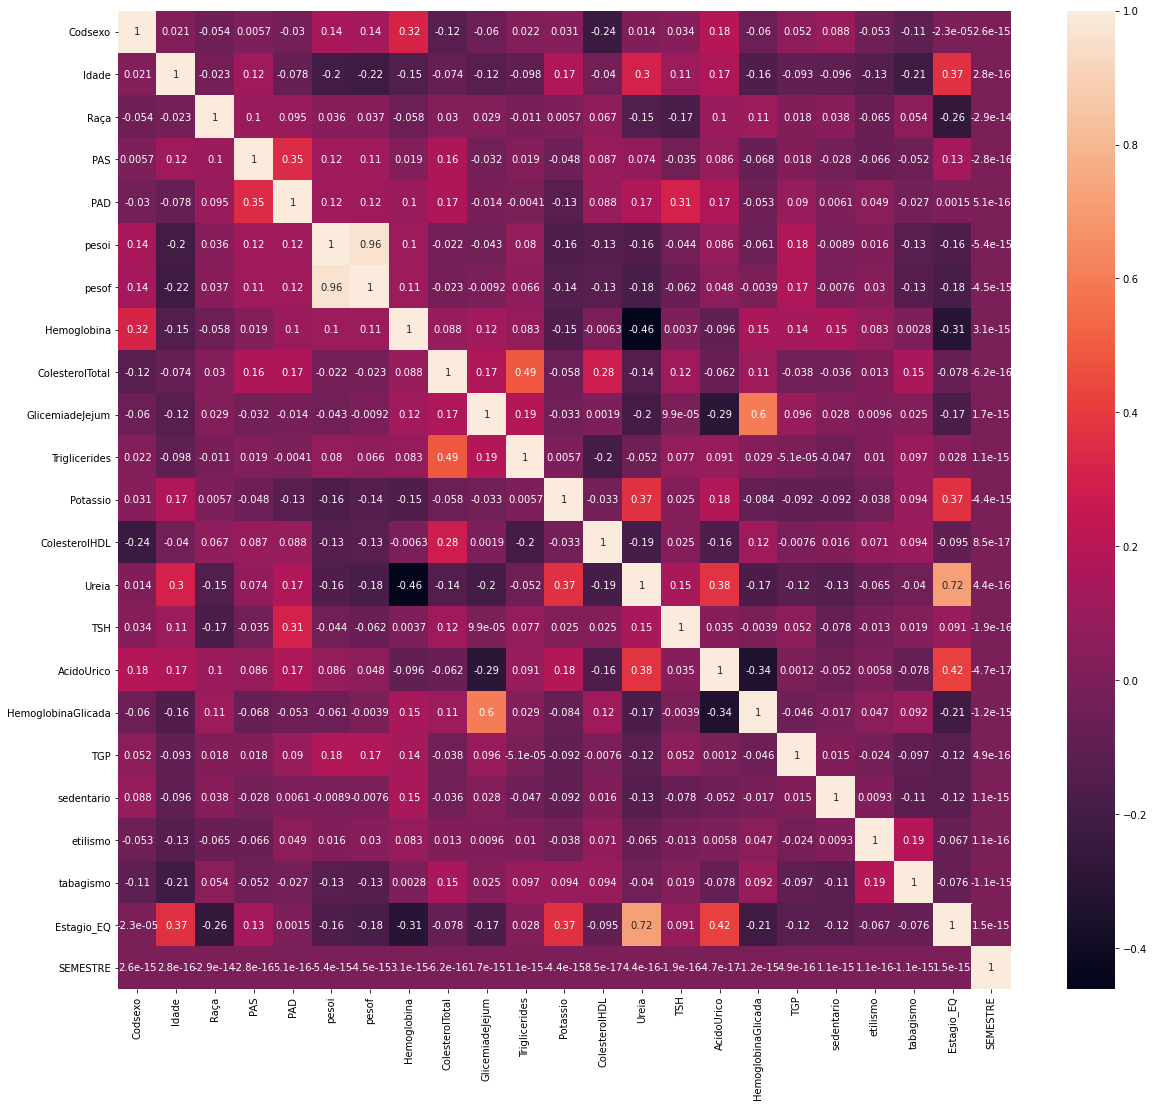

In [124]:
plt.figure(figsize=(20,18))
correlacao = dados_semestres[0].corr()
sns.heatmap(correlacao, annot=True)


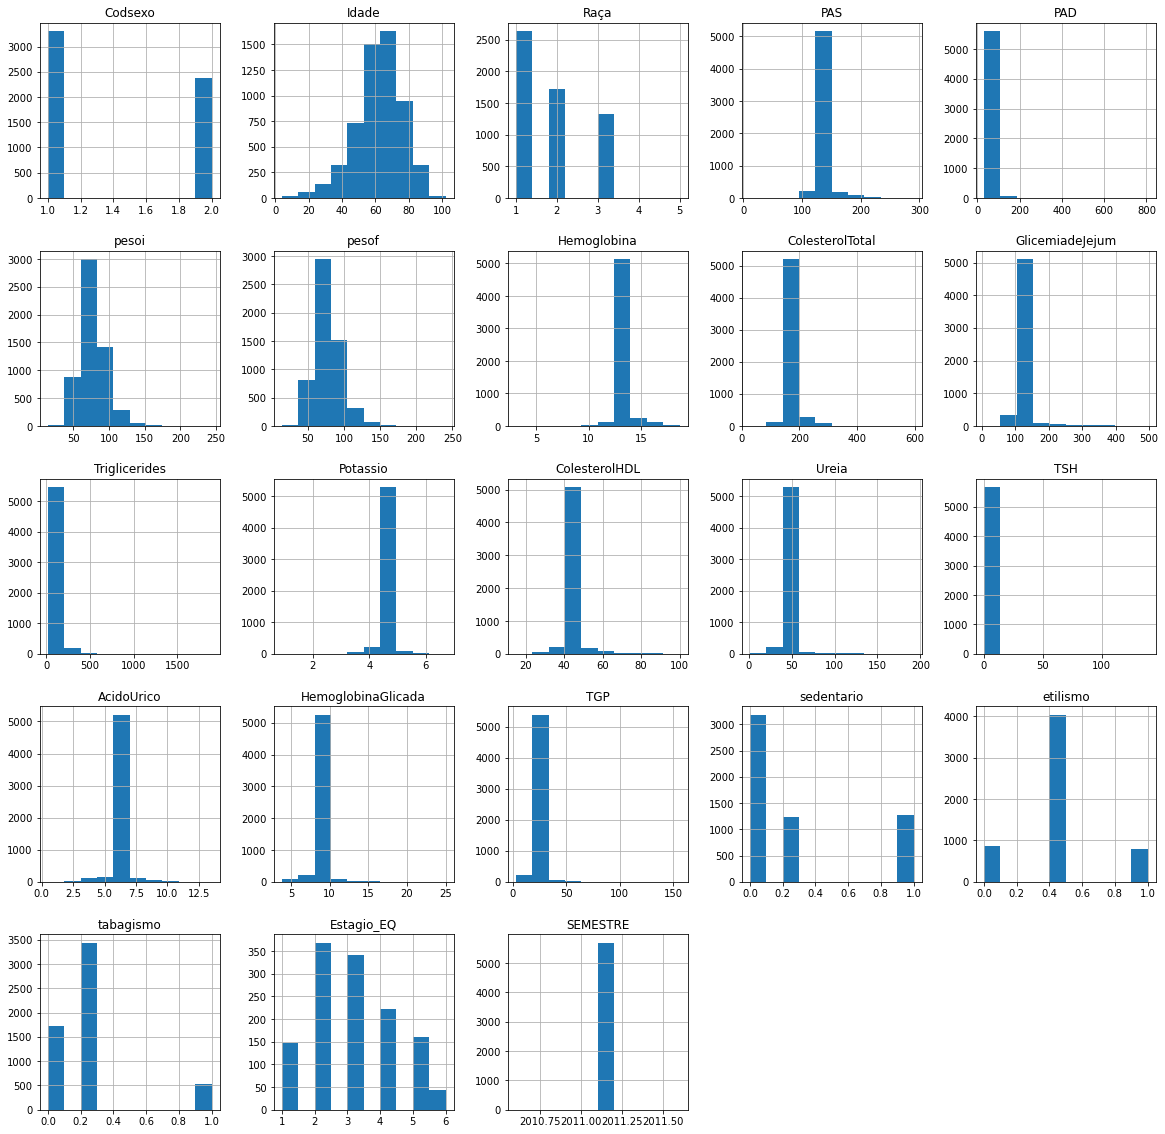

In [9]:
p = dados_semestres[0].hist(figsize = (20,20))

### Separando por estágio

In [10]:
dados_semestres[0]['Estagio_EQ'].unique()

array([ 3., nan,  5.,  2.,  4.,  6.,  1.])

In [11]:
df_estagio1 =[]
df_estagio2 =[]
df_estagio31 =[]
df_estagio32 =[]
df_estagio4 =[]
df_estagio5 =[]
for semestre in dados_semestres:
    df_estagio1.append([i for i in semestre.groupby('Estagio_EQ')][0][1]) 
    df_estagio2.append([i for i in semestre.groupby('Estagio_EQ')][1][1]) 
    df_estagio31.append([i for i in semestre.groupby('Estagio_EQ')][2][1]) 
    df_estagio32.append([i for i in semestre.groupby('Estagio_EQ')][3][1]) 
    df_estagio4.append([i for i in semestre.groupby('Estagio_EQ')][4][1]) 
    df_estagio5.append([i for i in semestre.groupby('Estagio_EQ')][5][1]) 


In [12]:
array_df = [df_estagio1, df_estagio2, df_estagio31, df_estagio32, df_estagio4, df_estagio5]

In [13]:
array_df[0][0].shape

(148, 23)

## Normalização

In [28]:
array_df_norm = []
semt = []
esta = []
for estagio in array_df:#separando os estagios 
    for semestre_estagio in estagio:#andando em cada daframe por semestre de um estágio específico
#         print(semestre)
        semt.append(semestre_estagio['SEMESTRE'])
        esta.append(semestre_estagio['Estagio_EQ'])
        scaler = preprocessing.MinMaxScaler( feature_range=(-1, 1) )
#         reg_mul_norm=np.zeros(semestre_estagio.shape)
        reg_mul_norm = scaler.fit_transform(semestre_estagio.iloc[:,:-1])
        reg_mul_norm = pd.DataFrame(reg_mul_norm,columns=semestre_estagio.keys()[:-1])
#         print(semestre_estagio['SEMESTRE'])
#         reg_mul_norm.insert(22,'SEMESTRE',semestre_estagio['SEMESTRE'],True)
#         print(reg_mul_norm['SEMESTRE'])
        array_df_norm.append(reg_mul_norm)
array_df_norm[0]#,semt[0]


,Codsexo,Idade,Raça,PAS,PAD,pesoi,pesof,Hemoglobina,ColesterolTotal,GlicemiadeJejum,...,ColesterolHDL,Ureia,TSH,AcidoUrico,HemoglobinaGlicada,TGP,sedentario,etilismo,tabagismo,Estagio_EQ
0,-1.0,0.114286,-1.0,0.233107,-0.03695,-0.490698,-0.381977,0.124150,-0.432776,-0.576851,...,-0.212290,0.033164,0.039426,0.208658,-0.318098,-0.608895,1.0,-0.047619,-0.533481,-1.0
1,-1.0,-0.571429,-1.0,0.233107,-0.03695,-0.706977,-0.736047,0.124150,-0.432776,-0.576851,...,-0.212290,-0.600000,0.039426,0.208658,-0.318098,-0.608895,1.0,-0.047619,1.000000,-1.0
2,-1.0,-0.542857,0.0,0.233107,-0.03695,-0.739535,-0.708140,0.124150,-0.432776,-0.576851,...,-0.212290,0.033164,-0.759904,0.208658,-0.318098,-0.608895,1.0,-0.047619,-0.533481,-1.0
3,1.0,0.171429,1.0,0.233107,-0.03695,-0.598837,-0.445349,0.124150,-0.432776,-0.576851,...,-0.212290,-0.226667,-0.831933,0.208658,-0.318098,-0.608895,-1.0,1.000000,-1.000000,-1.0
4,-1.0,0.457143,1.0,0.183486,-0.40000,-0.119767,-0.086047,0.124150,-0.432776,-0.576851,...,-0.212290,0.033164,-0.834334,0.208658,-0.318098,-0.608895,-1.0,-0.047619,-0.533481,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,1.0,-1.000000,0.0,0.233107,-0.03695,-0.948256,-0.797674,0.124150,-0.432776,-0.576851,...,-0.212290,0.033164,0.039426,0.208658,-0.318098,-0.608895,-1.0,-0.047619,-0.533481,-1.0
144,-1.0,0.200000,1.0,0.233107,-0.03695,-0.334884,-0.334884,0.290928,-0.623003,-0.576851,...,-0.084746,-0.733333,-0.037215,0.208658,-0.566434,-0.608895,-1.0,-0.047619,1.000000,-1.0
145,-1.0,-0.342857,1.0,0.233107,-0.03695,-0.176163,-0.183721,-0.021898,-0.432776,-0.576851,...,-0.212290,0.033164,0.039426,0.208658,-0.318098,-0.608895,1.0,1.000000,-1.000000,-1.0
146,-1.0,-0.314286,1.0,0.233107,-0.03695,-0.565698,-0.562791,0.124150,-0.432776,-0.576851,...,-0.212290,-0.893333,0.008403,-0.342857,-0.318098,0.195876,-1.0,-1.000000,-0.533481,-1.0


### Separando em conjunto de teste e treinamento

São 8 semestres e 6 estágios.

In [29]:
from sklearn.model_selection import train_test_split
xtrain_df = []
ytrain_df = []
xtest_df = []
ytest_df = []
for est in array_df_norm:
#     print(est)
    X = est.drop(columns=['Estagio_EQ'])
    y = est['Estagio_EQ']
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30,random_state= 20200301)

    xtrain_df.append(xtrain)
    ytrain_df.append(ytrain)
    xtest_df.append(xtest)
    ytest_df.append(ytest)

# Regressão  Linear Simples

In [92]:
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)

Codsexo

Test set evaluation:
_____________________________________
MAE: 0.0
MSE: 0.0
RMSE: 0.0
R2 Square 1.0
Train set evaluation:
_____________________________________
MAE: 0.0
MSE: 0.0
RMSE: 0.0
R2 Square 1.0


--------------------------------------------------------------------
Idade

Test set evaluation:
_____________________________________
MAE: 0.0
MSE: 0.0
RMSE: 0.0
R2 Square 1.0
Train set evaluation:
_____________________________________
MAE: 0.0
MSE: 0.0
RMSE: 0.0
R2 Square 1.0


--------------------------------------------------------------------
Raça

Test set evaluation:
_____________________________________
MAE: 0.0
MSE: 0.0
RMSE: 0.0
R2 Square 1.0
Train set evaluation:
_____________________________________
MAE: 0.0
MSE: 0.0
RMSE: 0.0
R2 Square 1.0


--------------------------------------------------------------------
PAS

Test set evaluation:
_____________________________________
MAE: 0.0
MSE: 0.0
RMSE: 0.0
R2 Square 1.0
Train set evaluation:
____________________________

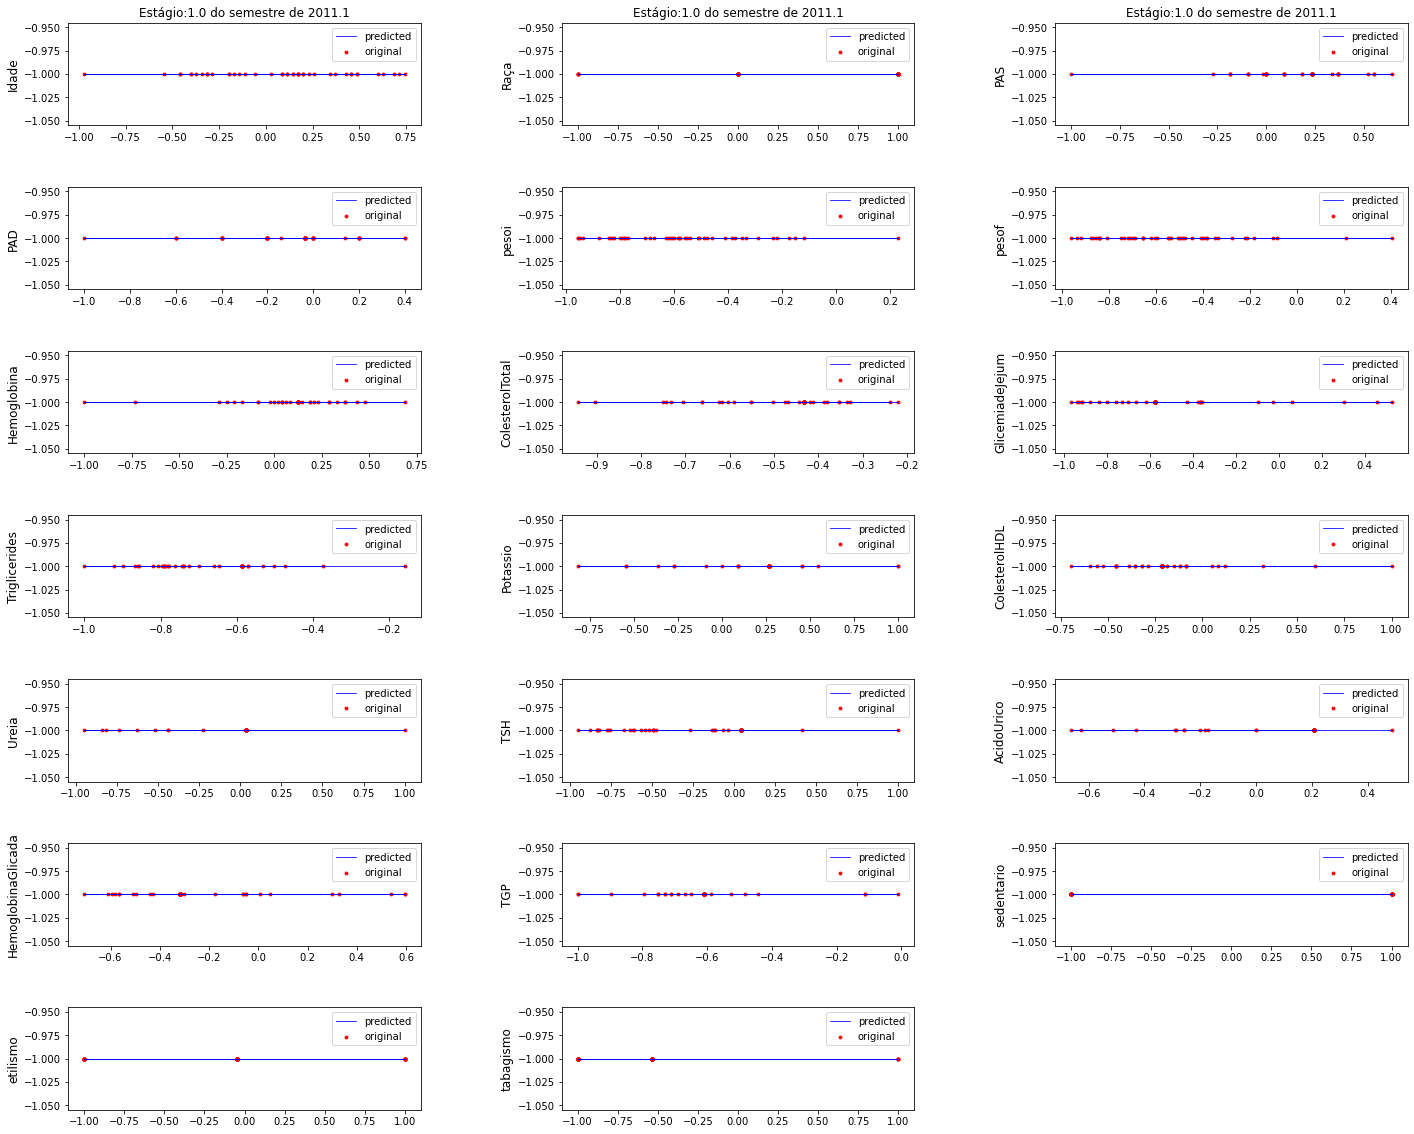

In [117]:
from sklearn.linear_model import LinearRegression
predicao =[]#array com as predições por estagio, que serão as colunas
#na linha são os semestres
for i in range(len(array_df_norm)):#aqui estou pegando o estagio, se é 1,2,3a,3b,4,5
#     print('Estágio: '+str(esta[i].iloc[0]))
#     print('Semestre: '+str(semt[i].iloc[0]))
    for coluna in xtrain_df[i].keys():
        
        modelo = LinearRegression()

        x = xtrain_df[i][coluna].values.reshape(-1, 1)

        modelo.fit( x, ytrain_df[i].values.reshape(-1,1))

        
        pred = modelo.predict(xtest_df[i][coluna].values.reshape(-1,1))
        predicao.append(pred)
        
        test_pred = modelo.predict(xtest_df[i][coluna].values.reshape(-1,1))
        train_pred = modelo.predict(xtrain_df[i][coluna].values.reshape(-1,1))
        print(coluna+'\n')
        print('Test set evaluation:\n_____________________________________')
        print_evaluate(ytest_df[i].values.reshape(-1,1), test_pred)
        print('====================================')
        print('Train set evaluation:\n_____________________________________')
        print_evaluate(ytrain_df[i].values.reshape(-1,1), train_pred)
        print('\n')
        print('--------------------------------------------------------------------')

#         plt.figure(figsize=(10,6))
#         plt.scatter(xtest_df[i][coluna],ytest_df[i], s=8, color="red", label="original")
#         plt.plot(xtest_df[i][coluna],pred, lw=0.8, color="blue", label="predicted")
# #         plt.scatter(ytest_df[i],pred)
#         plt.title('Estágio:'+str(esta[i].iloc[0])+" do semestre de "+str(semt[i].iloc[0]))
#         plt.xlabel('Estagio_EQ')
#         plt.ylabel(coluna)
#         plt.grid()
# #         plt.legend()
#         plt.show()
    if i==0:
        break
fig = plt.figure(figsize=(24,20))
fig.subplots_adjust(hspace=0.6, wspace=0.4)
for qual_est in range(len(array_df_norm)):
    for i in range(1,len(predicao)):
        ax = fig.add_subplot(7, 3, i)
        ax.plot(xtest_df[qual_est][xtest.keys()[i]],predicao[i], lw=0.8, color="blue", label="predicted")
        ax.scatter(xtest_df[qual_est][xtest.keys()[i]],ytest_df[qual_est], s=8, color="red", label="original")
        if xtest.keys()[i]=='Idade' or xtest.keys()[i]=='Raça' or xtest.keys()[i]=='PAS':
            plt.title('Estágio:'+str(esta[qual_est].iloc[0])+" do semestre de "+str(semt[qual_est].iloc[0]))
        plt.ylabel(xtest.keys()[i],fontsize=12)
        plt.legend()
        
    if qual_est==0:
        break